# Fast Matrix Multiplication of Circulant Matrices

Application: Speed up computation of random projections in the context of LSH ([Circulant Binary Embedding](http://www.jmlr.org/proceedings/papers/v32/yub14.pdf)).

Basic argumentation:
- Definition: convolution is multiplication of vector with circulant matrix
- Convolution theorem: convolution is Hadarmard (element wise) product in frequency domain
- FFT converts signal into frequency domain
- Convolution is in O(n^2), Hadarmard product is in O(n), FFT is in O(nlogn)
- Thus, multiplication of a vector with a circulant matrix can be done in basically O(n log n)

Further reading:
- [Analysis for more general matrice](http://users.iems.northwestern.edu/~linetsky/ExtrapolationAppendix.pdf)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from scipy.linalg import circulant

Create a random circulant matrix

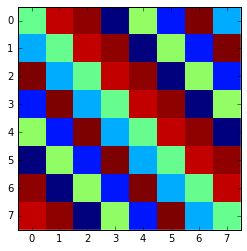

In [2]:
k = 8
c = np.random.rand(k)  # random vector inducing the circulant matrix
x = np.random.rand(k)  # some random vector that we wanna quickly multiply with the circulant matrix
C = circulant(c)       # circulant matrix
plt.imshow(C, interpolation='None')

Expensive computation:

In [3]:
np.inner(C,x)

array([ 1.14503474,  1.59832668,  1.37774406,  1.67293804,  1.35090707,
        1.38784599,  1.5691069 ,  1.56077294])

Hadamard product in frequency domain:

In [4]:
np.fft.ifft(np.fft.fft(c)*np.fft.fft(x))

array([ 1.14503474 +1.66533454e-16j,  1.59832668 -1.72605851e-16j,
        1.37774406 +1.45716772e-16j,  1.67293804 +2.34196317e-17j,
        1.35090707 -1.66533454e-16j,  1.38784599 +7.02554360e-17j,
        1.56910690 -1.45716772e-16j,  1.56077294 +7.89307829e-17j])